# WE USE CORRELATION TO FIND THE BEST RECOMMENDED MOVIE

In [1]:
##import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##Took a small subset of the movielens dataset for this system
columns = ['user_id', 'item_id', 'rating', 'timestamp']
data=pd.read_csv("u.data",sep="\t",names=columns)

In [4]:
data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
titles=pd.read_csv("Movie_Id_Titles")

In [6]:
titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


now we need to merge the two tables based on one column

In [8]:
movies=data.merge(titles,on="item_id")

In [9]:
movies.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# OBJECTIVE

- based on the user id and ratings we need to recommend a suitable movie for a given movie
- points of concern are number of ratings and ratings 
- we will simply correlate movies with the given movie on basis of the ratings


# EDA

- lets analyize the datasets

In [10]:
##lets sort the data based on the average ratings in a decending order
movies.groupby("title")["rating"].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [11]:
#a movie can have a 5star rating even when only 1 rating is given 
##so we need to group the data based on the total ratings given
movies.groupby("title")["rating"].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [12]:
##now lets create a dataframe having both the ratings as well as the no of ratings
ratings=pd.DataFrame(movies.groupby("title")["rating"].mean())

In [13]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [14]:
ratings["no. of ratings"]=pd.DataFrame(movies.groupby("title")["rating"].count())

In [15]:
ratings.head()

,rating,no. of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


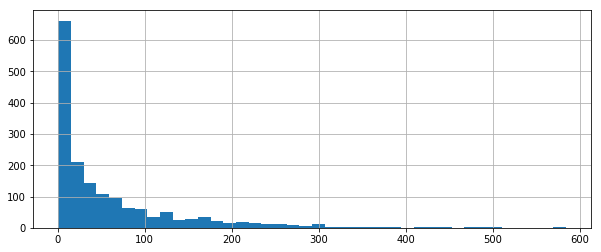

In [18]:
#now lets form histograms to check for the distribution of the data
plt.figure(figsize=(10,4))
ratings["no. of ratings"].hist(bins=40)

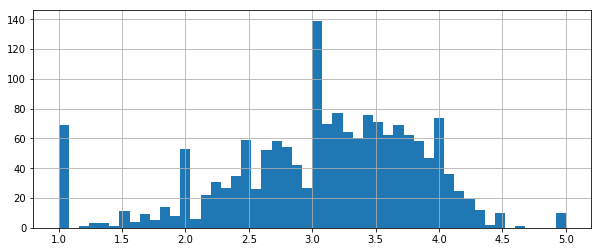

In [20]:
plt.figure(figsize=(10,4))
ratings["rating"].hist(bins=50)

In [21]:
##this is almost a gaussian surface except a few outliers which can be ignored

C:\Users\prabhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


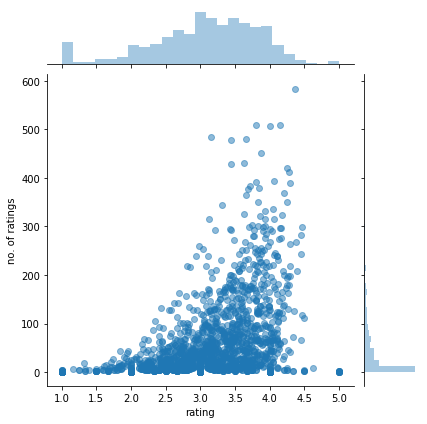

In [23]:
sns.jointplot(x='rating',y='no. of ratings',data=ratings,alpha=0.5)

In [24]:
##maximum ratings lie from 2-4

# RECOMMENDER SYSTEM

`Now let's create a matrix that has the user ids on one axis and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.



In [25]:
moviemat = movies.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
##sort ratings based on most rated movie
ratings.sort_values("no. of ratings",ascending=False).head()

,rating,no. of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [29]:
##lets choose two movies -star wars and fargo

Now let's grab the user ratings for those two movies:

In [32]:
##for starwars
star_wars=moviemat["Star Wars (1977)"]

We can then use corrwith() method to get correlations between two pandas series:

In [36]:
similar_to_starwars = moviemat.corrwith(star_wars)

C:\Users\prabhu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\prabhu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [37]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [38]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [40]:
corr_starwars = corr_starwars.join(ratings['no. of ratings'])
corr_starwars.head()

,Correlation,no. of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [42]:
corr_starwars[corr_starwars['no. of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no. of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [48]:
##lets do the same for fargo
fargo=moviemat["Fargo (1996)"]

In [49]:
fargo.head()

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
Name: Fargo (1996), dtype: float64

In [50]:
corr_with_fargo=moviemat.corrwith(fargo)

In [51]:
corr_fargo = pd.DataFrame(corr_with_fargo,columns=['Correlation'])
corr_fargo.dropna(inplace=True)
corr_fargo.head()

,Correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


In [52]:
corr_fargo=corr_fargo.join(ratings["no. of ratings"])

In [54]:
corr_fargo.head()

,Correlation,no. of ratings
title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


In [55]:
corr_fargo.dropna(inplace=True)

In [56]:
corr_fargo[corr_fargo['no. of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no. of ratings
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
